In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

C:\Users\Tech\Anaconda2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Tech\Anaconda2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Tech\Anaconda2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Tech\Anaconda2\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
data = pd.read_csv("anylogic_dataset_800.csv")
data.head()

,vehicle_id,vehicle_localmips,total_tasks,total_task_mips,tasks_completed_local,local_failed,tasks_from_others,other_task_mips,others_completed,others_failed,total_execution_time,total_computation_time,simulation_time,trust_factor,z_score,other_total_comp_time
0,307,2733.266310,1068,790819.8329,265,0,803,594288.74260,787,16,289.331424,284.788121,6000,20834.143720,0.201158,212.884740
1,310,1400.104299,314,235023.5362,269,0,45,34683.77499,26,19,167.861449,157.939327,6000,492.803679,13.768739,14.850158
2,313,1193.868292,380,287256.1731,313,0,67,52298.72333,25,42,240.609601,212.596029,6000,-1222.103462,7.935582,15.792537
3,316,1797.806593,428,320964.2627,131,0,297,222200.04570,297,0,178.531030,178.531030,6000,12359.507780,0.461767,123.595078
4,319,1333.797887,322,243113.6927,139,0,183,137793.91030,183,0,182.271763,182.271763,6000,10330.943820,0.953057,103.309438


In [3]:
#shuffle the dataset
#data = data.sample(frac=1)
#data.head()

In [4]:
#data.reset_index(inplace=True,drop=True)
#data.head()

In [5]:
df = pd.DataFrame(data['trust_factor'])
x = df[['trust_factor']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized = df_normalized.round(1)
data["normalized_trust_values"] = df_normalized
data.head()

,vehicle_id,vehicle_localmips,total_tasks,total_task_mips,tasks_completed_local,local_failed,tasks_from_others,other_task_mips,others_completed,others_failed,total_execution_time,total_computation_time,simulation_time,trust_factor,z_score,other_total_comp_time,normalized_trust_values
0,307,2733.266310,1068,790819.8329,265,0,803,594288.74260,787,16,289.331424,284.788121,6000,20834.143720,0.201158,212.884740,0.9
1,310,1400.104299,314,235023.5362,269,0,45,34683.77499,26,19,167.861449,157.939327,6000,492.803679,13.768739,14.850158,0.2
2,313,1193.868292,380,287256.1731,313,0,67,52298.72333,25,42,240.609601,212.596029,6000,-1222.103462,7.935582,15.792537,0.2
3,316,1797.806593,428,320964.2627,131,0,297,222200.04570,297,0,178.531030,178.531030,6000,12359.507780,0.461767,123.595078,0.6
4,319,1333.797887,322,243113.6927,139,0,183,137793.91030,183,0,182.271763,182.271763,6000,10330.943820,0.953057,103.309438,0.5


In [6]:
criteria = [data['normalized_trust_values'].between(0.0, 0.3), data['normalized_trust_values'].between(0.4, 0.6), data['normalized_trust_values'].between(0.7, 1.0)]
# values = ['Malicious', 'Partially Trusted', 'Trusted']
values = [0, 1, 2]

data['trust_labels'] = np.select(criteria, values, 0)
data.head()

,vehicle_id,vehicle_localmips,total_tasks,total_task_mips,tasks_completed_local,local_failed,tasks_from_others,other_task_mips,others_completed,others_failed,total_execution_time,total_computation_time,simulation_time,trust_factor,z_score,other_total_comp_time,normalized_trust_values,trust_labels
0,307,2733.266310,1068,790819.8329,265,0,803,594288.74260,787,16,289.331424,284.788121,6000,20834.143720,0.201158,212.884740,0.9,2
1,310,1400.104299,314,235023.5362,269,0,45,34683.77499,26,19,167.861449,157.939327,6000,492.803679,13.768739,14.850158,0.2,0
2,313,1193.868292,380,287256.1731,313,0,67,52298.72333,25,42,240.609601,212.596029,6000,-1222.103462,7.935582,15.792537,0.2,0
3,316,1797.806593,428,320964.2627,131,0,297,222200.04570,297,0,178.531030,178.531030,6000,12359.507780,0.461767,123.595078,0.6,1
4,319,1333.797887,322,243113.6927,139,0,183,137793.91030,183,0,182.271763,182.271763,6000,10330.943820,0.953057,103.309438,0.5,1


In [7]:
data = data.drop(['vehicle_id', 'local_failed', 'simulation_time', 'trust_factor', 'normalized_trust_values', 'z_score'], axis=1)

In [8]:
pd.set_option('float_format', '{:f}'.format)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
vehicle_localmips,800.000000,2234.627797,730.957858,1002.883792,1578.471382,2270.615249,2884.001215,3490.773797
total_tasks,800.000000,592.560000,207.993234,224.000000,431.000000,583.000000,739.000000,1184.000000
total_task_mips,800.000000,444183.192650,155797.026968,165439.599100,323710.687800,437143.258450,551286.627500,885765.413700
tasks_completed_local,800.000000,166.661250,89.751954,26.000000,101.000000,151.000000,210.250000,598.000000
tasks_from_others,800.000000,425.898750,172.580085,45.000000,290.750000,410.000000,525.250000,982.000000
other_task_mips,800.000000,319240.798556,129178.395349,34683.774990,218512.846950,307237.309850,394702.536600,732807.080000
others_completed,800.000000,392.661250,188.391316,5.000000,240.750000,384.500000,506.000000,982.000000
others_failed,800.000000,33.237500,40.328732,0.000000,1.000000,18.000000,51.000000,216.000000
total_execution_time,800.000000,201.976072,42.452232,117.640954,170.842238,182.657233,233.637949,331.808986
total_computation_time,800.000000,185.258953,40.047876,82.645617,156.219808,174.191501,215.775038,300.843758


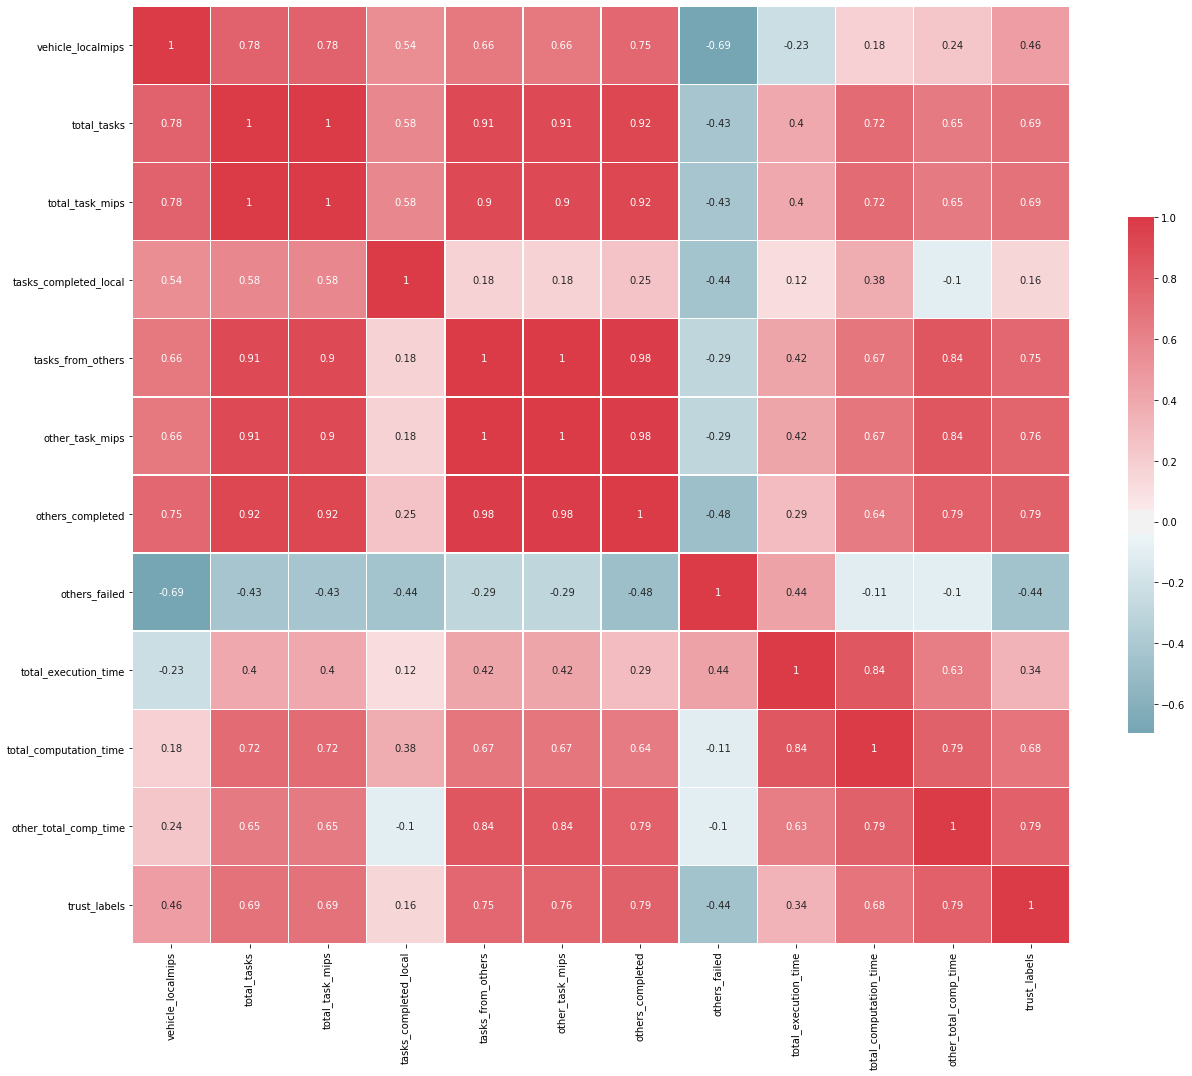

In [9]:
corr = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(21, 19))
sns.heatmap(corr, cmap=cmap, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [10]:
corr

,vehicle_localmips,total_tasks,total_task_mips,tasks_completed_local,tasks_from_others,other_task_mips,others_completed,others_failed,total_execution_time,total_computation_time,other_total_comp_time,trust_labels
vehicle_localmips,1.000000,0.776702,0.777077,0.537716,0.656435,0.656654,0.750016,-0.694517,-0.230968,0.181258,0.238603,0.456628
total_tasks,0.776702,1.000000,0.999751,0.576734,0.905262,0.905364,0.922117,-0.433651,0.403502,0.722171,0.653756,0.694556
total_task_mips,0.777077,0.999751,1.000000,0.577882,0.904366,0.904895,0.921419,-0.434229,0.403145,0.722116,0.652747,0.694647
tasks_completed_local,0.537716,0.576734,0.577882,1.000000,0.175019,0.175765,0.254781,-0.441214,0.120288,0.381178,-0.104771,0.158749
tasks_from_others,0.656435,0.905262,0.904366,0.175019,1.000000,0.999735,0.978833,-0.293178,0.423743,0.672125,0.842393,0.754519
other_task_mips,0.656654,0.905364,0.904895,0.175765,0.999735,1.000000,0.978697,-0.293678,0.423962,0.672700,0.842594,0.755207
others_completed,0.750016,0.922117,0.921419,0.254781,0.978833,0.978697,1.000000,-0.482641,0.294767,0.639323,0.793823,0.786088
others_failed,-0.694517,-0.433651,-0.434229,-0.441214,-0.293178,-0.293678,-0.482641,1.000000,0.436363,-0.110281,-0.103378,-0.443284
total_execution_time,-0.230968,0.403502,0.403145,0.120288,0.423743,0.423962,0.294767,0.436363,1.000000,0.836353,0.626873,0.341605
total_computation_time,0.181258,0.722171,0.722116,0.381178,0.672125,0.672700,0.639323,-0.110281,0.836353,1.000000,0.786495,0.677823


In [11]:
#check missing
data.isnull().sum().sum()

0

In [12]:
train_data,test_data = train_test_split(data, test_size=0.3, random_state=0)

In [13]:
# Training Data
train_x = train_data.iloc[:,:11]
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = test_data.iloc[:,:11]
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (560, 11)
Testing Data : (240, 11)


In [14]:
# Training Data
train_y = train_data.iloc[:,11:]
print("Training Data :", train_y.shape)

# Testing Data
test_y = test_data.iloc[:,11:]
print("Testing Data :", test_y.shape)

Training Data : (560, 1)
Testing Data : (240, 1)


In [15]:
X = tf.placeholder(tf.float32, [None,11])
Y = tf.placeholder(tf.uint8, [None, 1])

In [16]:
Y_one_hot = tf.one_hot(Y, 3)  # one hot encoding
Y_one_hot = tf.reshape(Y_one_hot, [-1, 3])

In [17]:
W = tf.Variable(tf.random_normal([11, 3],seed=1), name='weight')
b = tf.Variable(tf.random_normal([3],seed=1), name='bias')

In [18]:
logits = tf.matmul(X, W) + b

In [19]:
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)

In [20]:
train  = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

In [21]:
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(150001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

Step:     0	Loss: 2.206	Acc: 59.11%
Step:  1000	Loss: 0.477	Acc: 83.21%
Step:  2000	Loss: 0.404	Acc: 86.25%
Step:  3000	Loss: 0.365	Acc: 88.04%
Step:  4000	Loss: 0.339	Acc: 89.29%
Step:  5000	Loss: 0.319	Acc: 90.36%
Step:  6000	Loss: 0.303	Acc: 91.07%
Step:  7000	Loss: 0.290	Acc: 91.61%
Step:  8000	Loss: 0.279	Acc: 91.96%
Step:  9000	Loss: 0.269	Acc: 92.14%
Step: 10000	Loss: 0.260	Acc: 92.86%
Step: 11000	Loss: 0.252	Acc: 93.04%
Step: 12000	Loss: 0.245	Acc: 93.39%
Step: 13000	Loss: 0.239	Acc: 93.57%
Step: 14000	Loss: 0.233	Acc: 93.93%
Step: 15000	Loss: 0.228	Acc: 94.46%
Step: 16000	Loss: 0.223	Acc: 94.64%
Step: 17000	Loss: 0.219	Acc: 94.64%
Step: 18000	Loss: 0.214	Acc: 94.64%
Step: 19000	Loss: 0.210	Acc: 95.18%
Step: 20000	Loss: 0.207	Acc: 95.18%
Step: 21000	Loss: 0.203	Acc: 95.36%
Step: 22000	Loss: 0.200	Acc: 95.36%
Step: 23000	Loss: 0.197	Acc: 95.36%
Step: 24000	Loss: 0.194	Acc: 95.54%
Step: 25000	Loss: 0.191	Acc: 95.54%
Step: 26000	Loss: 0.189	Acc: 95.71%
Step: 27000	Loss: 0.186	Acc: